# Data Analysis report on Titanic Datasheet

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
titanic=pd.read_csv('titanic.csv')

# Dataframe of titanic

In [3]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [99]:
#Cheking for  missing datas

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [100]:
#Removal of unimportant columns

In [43]:
t=titanic.drop(["Ticket","Fare","Cabin"],axis=1)
t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S


# Survival rate according to Pclass, Sex, Embarked,Family,Age

# 1.Pclass

In [47]:
d=t.groupby(['Survived','Pclass']).size()
d

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
dtype: int64

In [101]:
#The dataframe shows the number people surivived according to Pclass

In [40]:
e=pd.crosstab(t["Pclass"],t["Survived"])
e

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


# Number of Survival and Non-survival by Pclass

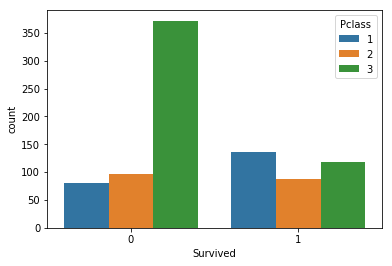

In [41]:
sns.countplot(t['Survived'],data=t,hue='Pclass')

# Percentage of Survival and Non-survival by Pclass

In [90]:
def surclass(s1):
    t[t['Survived']==s1].groupby('Pclass').count()['Survived'].plot(kind='pie',autopct="%0.3f%%")
    if(s1==0):
        plt.title('Non-Survival of class')
    else:    
        plt.title('Survival of class')
    plt.show()

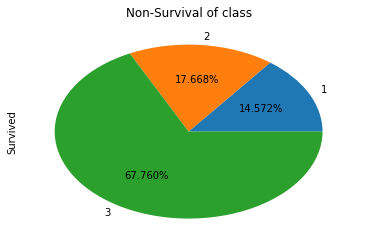

In [91]:
surclass(0)

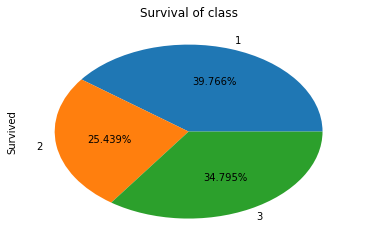

In [92]:
surclass(1)

# 2.Sex

In [51]:
u=t.groupby(['Survived','Sex']).size()
u

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
dtype: int64

In [104]:
#The dataframe shows the number people surivived according to Sex

In [102]:
n=pd.crosstab(t["Sex"],t["Survived"])
n

Survived,0,1
Sex,,
female,81,233
male,468,109


# Number of Survival and Non-survival by Sex

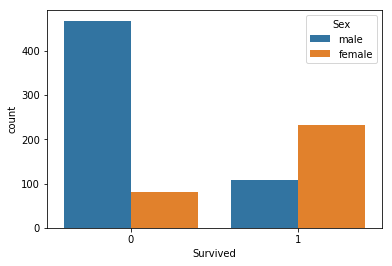

In [52]:
sns.countplot(t['Survived'],data=t,hue='Sex')

# Percentage of Survival and Non-survival by Sex

In [136]:
def sursex(s2):
    t[t['Survived']==s2].groupby('Sex').count()['Survived'].plot(kind='pie',autopct="%0.3f%%")
    if(s2==0):
        plt.title('Non-Survival of gender')
    else:    
        plt.title('Survival of gender')
    plt.show()

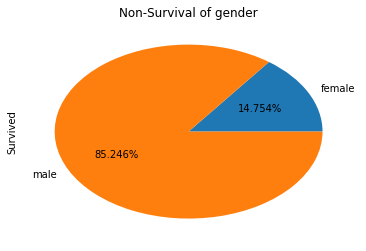

In [137]:
sursex(0)

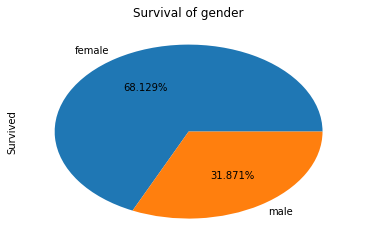

In [138]:
sursex(1)

# 3.Embarked

In [56]:
f=t.groupby(['Survived','Embarked']).size()
f

Survived  Embarked
0         C            75
          Q            47
          S           427
1         C            93
          Q            30
          S           217
dtype: int64

In [129]:
#The dataframe shows the number people surivived according to Sex

In [106]:
n=pd.crosstab(t["Embarked"],t["Survived"])
n

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


# Number of Survival and Non-survival by Gender

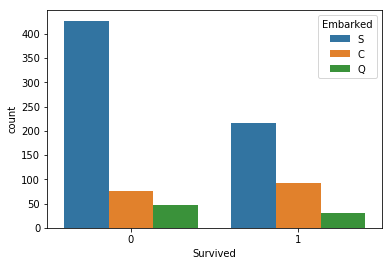

In [60]:
sns.countplot(t['Survived'],data=t,hue='Embarked')

# Percentage of Survival and Non-survival by Embarked

In [133]:
def suremb(s3):
    t[t['Survived']==s3].groupby('Embarked').count()['Survived'].plot(kind='pie',autopct="%0.3f%%")
    if(s3==0):
        plt.title('Non-Survival of embarked')
    else:    
        plt.title('Survival of embarked')
    plt.show()

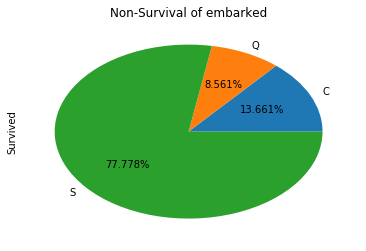

In [134]:
suremb(0)

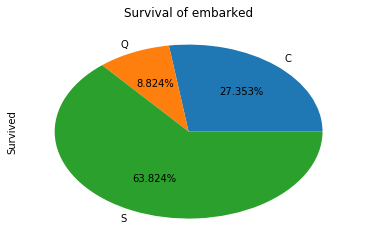

In [135]:
suremb(1)

# 4.Family

In [112]:
#making a new column Family

In [107]:
t['Family']="None"

In [111]:
a=t['SibSp']+t['Parch']
t['Family']=a
t

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,C,1


In [ ]:
#The dataframe shows the number people surivived according to Family

In [128]:
n=pd.crosstab(t["Family"],t["Survived"])
n

Survived,0,1
Family,,
0,374,163
1,72,89
2,43,59
3,8,21
4,12,3
5,19,3
6,8,4
7,6,0
10,7,0


# Number of Survival and Non-survival by Family

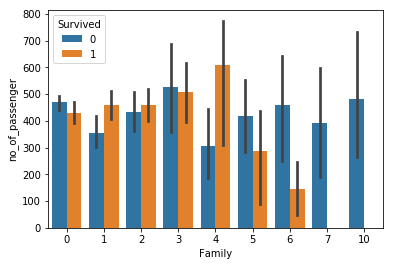

In [123]:
sns.barplot(x='Family',y=t.index,data=t,hue='Survived')
plt.ylabel('no_of_passenger')
plt.show()

# Percentage of Survival and Non-survival by Family

In [130]:
def surfam(s4):
    t[t['Survived']==s4].groupby('Family').count()['Survived'].plot(kind='pie',autopct="%0.3f%%")
    if(s4==0):
        plt.title('Non-Survival of Family')
    else:    
        plt.title('Survival of Family')
    plt.show()

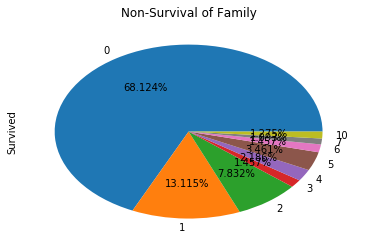

In [131]:
surfam(0)

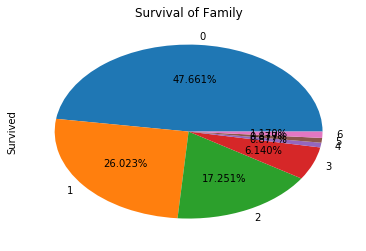

In [132]:
surfam(1)

In [143]:
t

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,C,1


# 4.Age

In [171]:
avgmr=t[t['Name'].str.contains('Mr. ')]['Age'].mean()
avgmiss=t[t['Name'].str.contains('Miss. ')]['Age'].mean()
avgmrs=t[t['Name'].str.contains('Mrs. ')]['Age'].mean()
avgmaster=t[t['Name'].str.contains('Master. ')]['Age'].mean()
print("Average age of Man:",avgmr)
print("Average age of Unmarried woman:",avgmiss)
print("Average age of Married woman:",avgmrs)
print("Average age of Children:",avgmaster)

Average age of Man: 32.332089552238806
Average age of Unmarried woman: 21.773972602739725
Average age of Married woman: 35.898148148148145
Average age of Children: 4.574166666666667


In [172]:
x1=t[t['Name'].str.contains('Mr. ')]['Age']
x2=t[t['Name'].str.contains('Miss. ')]['Age']
x3=t[t['Name'].str.contains('Mrs. ')]['Age']
x4=t[t['Name'].str.contains('Master. ')]['Age']

In [173]:
x1.fillna(value={'Age': avgmr},inplace=True)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [174]:
x1.head()

0     22.0
4     35.0
5      NaN
6     54.0
12    20.0
Name: Age, dtype: float64